## 📌 Problem Statement

In this project, we analyze transactional data from a Brazilian e-commerce store, Olist, using three datasets: orders, order payments, and customer information. The primary objective is to clean and integrate these datasets and perform exploratory data analysis to uncover trends in customer payment behavior.

The client is particularly concerned about the financial implications of credit card transactions due to their higher processing fees compared to other payment methods. Therefore, the analysis focuses on the following key questions:

- What is the distribution and range of payment amounts across different payment types (credit card, debit card, boleto, and vouchers)?  
- Do customers using credit cards tend to make higher-value purchases compared to other payment methods?  
- How do payment values vary by payment type on a yearly basis?  
- What are the monthly trends in total payment value over time?  

The insights derived from this analysis aim to help the client better understand the impact of payment method preferences on revenue and operational costs, supporting data-driven decision-making.


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Data Loading**

In [72]:
# Load the order data
orders_data = pd.read_excel('orders.xlsx')
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [73]:
# Load the payments data
payments_data = pd.read_excel('order_payment.xlsx')
payments_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,NaN


In [74]:
# Load the customers data
customers_data = pd.read_excel('customers.xlsx')
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Describing the data**

In [75]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99444 entries, 0 to 99443
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99444 non-null  object        
 1   customer_id                    99444 non-null  object        
 2   order_status                   99444 non-null  object        
 3   order_purchase_timestamp       99444 non-null  datetime64[ns]
 4   order_approved_at              99284 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97661 non-null  datetime64[ns]
 6   order_delivered_customer_date  96479 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99444 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [76]:
payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103887 non-null  object 
 1   payment_sequential    103887 non-null  int64  
 2   payment_type          103887 non-null  object 
 3   payment_installments  103887 non-null  int64  
 4   payment_value         103885 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [77]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Handling missing data**

In [78]:
# Check missing data in the orders data
orders_data.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [79]:
# Check missing data in the payments data
payments_data.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,2


In [80]:
# Check missing data in the customers data
customers_data.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [81]:
# Filling in the missing values in orders data with a default value
orders_data.fillna(0, inplace=True)
# Check if there are null values in orders_data
orders_data.isnull().sum()

/tmp/ipython-input-1812442917.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  orders_data.fillna(0, inplace=True)


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [82]:
# Drop rows with missing values in payments data
payments_data.dropna(inplace=True)
# Check if there are null values in payments data
payments_data.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


**Removing Duplicate Data**

In [83]:
# Check for duplicates in orders data
orders_data.duplicated().sum()

np.int64(3)

In [84]:
# Remove duplicates from orders data
orders_data.drop_duplicates(inplace=True)
# Check for duplicates in orders data
orders_data.duplicated().sum()

np.int64(0)

In [85]:
# Check for duplicates in payments data
payments_data.duplicated().sum()

np.int64(1)

In [86]:
# Remove duplicates from payments data
payments_data.drop_duplicates(inplace=True)
# Check for duplicates in payments data
payments_data.duplicated().sum()

np.int64(0)

**Filtering the data**

In [87]:
# Select a subset of the orders data based on the order status
invoiced_orders_data = orders_data[orders_data['order_status'] == 'invoiced']
# Reset the index
invoiced_orders_data.reset_index(drop=True, inplace=True)
# Display the filtered data
invoiced_orders_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,0,0,2017-05-09
1,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,0,0,2018-08-21
2,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,0,0,2017-08-28
3,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,0,0,2017-06-06
4,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,0,0,2017-12-20
...,...,...,...,...,...,...,...,...
309,41ad2ae32ee66c07ef3b0301ba02ad27,5c7f8d14a0a12198d1d07167d7d343b3,invoiced,2017-11-24 15:54:47,2017-11-24 19:33:24,0,0,2017-12-18
310,9ffb325177b96c422447e3b9ee9a6270,e4079117ea0dc8bc27274e34c4796515,invoiced,2018-05-10 19:11:18,2018-05-10 19:37:27,0,0,2018-06-05
311,021dac6e3120485db6a77474aa21b979,c40f7f00e91eb8a0da1e58484380a796,invoiced,2017-11-24 22:46:09,2017-11-25 01:53:42,0,0,2017-12-15
312,c526fe83c01c48066394ff5d81f9ab9a,6c678c38f3a0874b7bfeeb2d5fb22876,invoiced,2018-08-07 11:11:30,2018-08-07 11:25:01,0,0,2018-08-17


In [88]:
# Select a subset of the payment data where payment type is equal to Credit Card and payement value is greater than 1000
credit_card_payments_data = payments_data[(payments_data['payment_type'] == 'credit_card') & (payments_data['payment_value'] > 1000)]
# Reset the index
credit_card_payments_data.reset_index(drop=True, inplace=True)
# Display the filtered data
credit_card_payments_data

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,886b114d034f4ac1d39d964c1b2a8182,1,credit_card,10,2027.16
1,62d9b911d7c56cf455f660eecb8ddd3a,1,credit_card,10,1002.73
2,4ff8e28200e5a7a50b448cfaaf1f8ed3,1,credit_card,10,2288.31
3,ce6d150fb29ada17d2082f4847107665,1,credit_card,10,1586.47
4,e11fec6c25945565c1ef4f14fc3c03b7,1,credit_card,10,1995.69
...,...,...,...,...,...
939,21a3f15754b759c91fff4535aaeb3486,1,credit_card,10,1224.03
940,b0b0d3285e59abf2f6c9d7e1bf761323,1,credit_card,10,3044.12
941,fc20b8e282da6f3fbcdd3a3cedecb723,1,credit_card,10,3782.19
942,fb2dccfadca8cd6ebddc5d10ae48d1f7,1,credit_card,3,1134.44


In [89]:
# Select a subset of customers based on customer state = SP
customers_data_state = customers_data[customers_data['customer_state'] == 'SP']
# Reset the index
customers_data_state.reset_index(drop=True, inplace=True)
# Display the filtered data
customers_data_state

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
41741,f255d679c7c86c24ef4861320d5b7675,d111b06b6f3a2add0d2241325f65b5ca,13500,rio claro,SP
41742,f5a0b560f9e9427792a88bec97710212,b3e53d18a997f27a3ffd16da497eaf58,7790,cajamar,SP
41743,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
41744,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP


**Merge and Join Dataframes**

In [90]:
# Merge order data with payments dta on order_id column
orders_payments_merged_data = pd.merge(orders_data, payments_data, on='order_id')
# Display the merged data
orders_payments_merged_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
103879,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1,credit_card,3,85.08
103880,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,credit_card,3,195.00
103881,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,credit_card,5,271.01
103882,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,credit_card,4,441.16


In [91]:
# Join the merged data with our customers data on the customer_id column
orders_payments_customers_joined = pd.merge(orders_payments_merged_data, customers_data, on='customer_id')
# Display the merged data
orders_payments_customers_joined

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103879,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1,credit_card,3,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
103880,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,credit_card,3,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
103881,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,credit_card,5,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
103882,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,credit_card,4,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


**Data Visualization**

In [92]:
orders_payments_customers_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103884 entries, 0 to 103883
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103884 non-null  object        
 1   customer_id                    103884 non-null  object        
 2   order_status                   103884 non-null  object        
 3   order_purchase_timestamp       103884 non-null  datetime64[ns]
 4   order_approved_at              103884 non-null  object        
 5   order_delivered_carrier_date   103884 non-null  object        
 6   order_delivered_customer_date  103884 non-null  object        
 7   order_estimated_delivery_date  103884 non-null  datetime64[ns]
 8   payment_sequential             103884 non-null  int64         
 9   payment_type                   103884 non-null  object        
 10  payment_installments           103884 non-null  int64         
 11  

**Feature Engineering**

In [93]:
# Create fields called month_year, week_year and year from order_purchase_timestamp
orders_payments_customers_joined['month_year'] = orders_payments_customers_joined['order_purchase_timestamp'].dt.to_period('M')
orders_payments_customers_joined['week_year'] = orders_payments_customers_joined['order_purchase_timestamp'].dt.to_period('W')
orders_payments_customers_joined['year'] = orders_payments_customers_joined['order_purchase_timestamp'].dt.to_period('Y')
orders_payments_customers_joined

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month_year,week_year,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-10-02/2017-10-08,2017
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-10-02/2017-10-08,2017
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-10-02/2017-10-08,2017
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,2018-07-23/2018-07-29,2018
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,2018-08-06/2018-08-12,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103879,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1,credit_card,3,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03,2017-03-06/2017-03-12,2017
103880,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,credit_card,3,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02,2018-02-05/2018-02-11,2018
103881,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,credit_card,5,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08,2017-08-21/2017-08-27,2017
103882,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,credit_card,4,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01,2018-01-08/2018-01-14,2018


In [94]:
grouped_data = orders_payments_customers_joined.groupby('month_year')['payment_value'].sum().reset_index()
grouped_data

,month_year,payment_value
0,2016-09,252.24
1,2016-10,59090.48
2,2016-12,19.62
3,2017-01,138488.04
4,2017-02,291908.01
5,2017-03,449863.60
6,2017-04,417788.03
7,2017-05,592918.82
8,2017-06,511276.38
9,2017-07,592382.92


In [96]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   month_year     25 non-null     period[M]
 1   payment_value  25 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 532.0 bytes


In [97]:
# Convert month_year from period into string
grouped_data['month_year'] = grouped_data['month_year'].astype(str)
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month_year     25 non-null     object 
 1   payment_value  25 non-null     float64
dtypes: float64(1), object(1)
memory usage: 532.0+ bytes


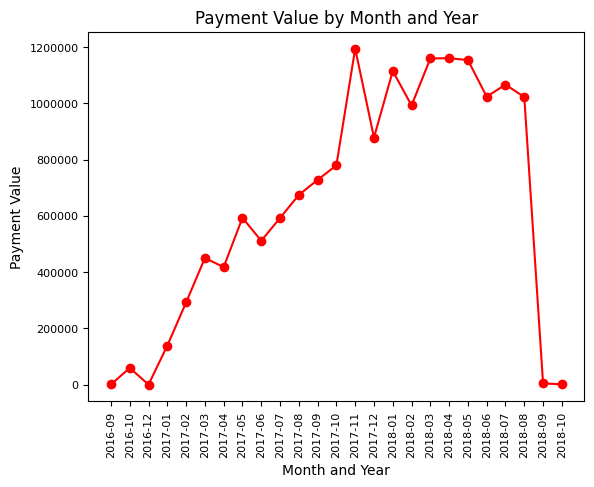

In [110]:
# creating a plot
plt.plot(grouped_data['month_year'], grouped_data['payment_value'], color='red', marker='o')
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.xlabel('Month and Year')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Payment Value')
plt.yticks(fontsize=8)
plt.title('Payment Value by Month and Year')
plt.show()


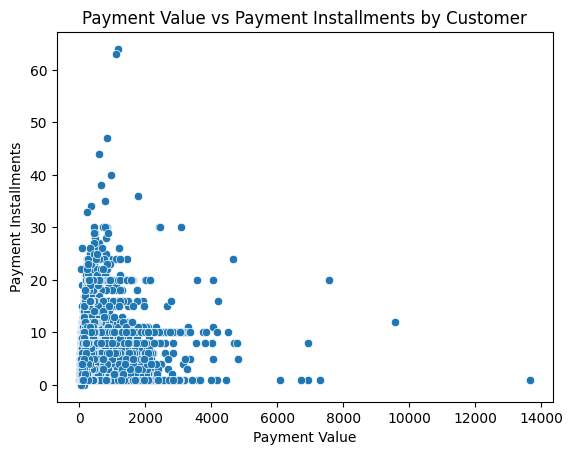

In [109]:
# Scatter Plot

# Create the Dataframe
scatter_df = orders_payments_customers_joined.groupby('customer_unique_id').agg({'payment_value': 'sum', 'payment_installments': 'sum'}).reset_index()
sns.scatterplot(x='payment_value', y='payment_installments', data=scatter_df)
plt.xlabel('Payment Value')
plt.ylabel('Payment Installments')
plt.title('Payment Value vs Payment Installments by Customer')
plt.show()

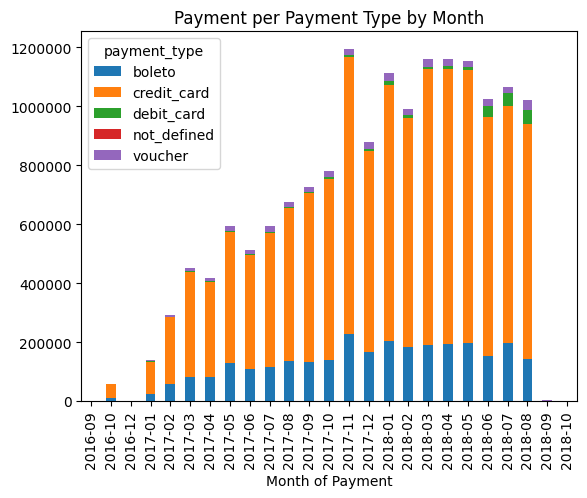

In [112]:
# Creating a bar chart
bar_chart_df = orders_payments_customers_joined.groupby(['payment_type', 'month_year'])['payment_value'].sum().reset_index()

pivot_data = bar_chart_df.pivot(index='month_year', columns='payment_type', values='payment_value')
pivot_data.plot(kind='bar', stacked='True')
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.xlabel('Month of Payment')
plt.title('Payment per Payment Type by Month')
plt.show()

/tmp/ipython-input-2058533515.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([payment_values[payment_types == 'credit_card'],


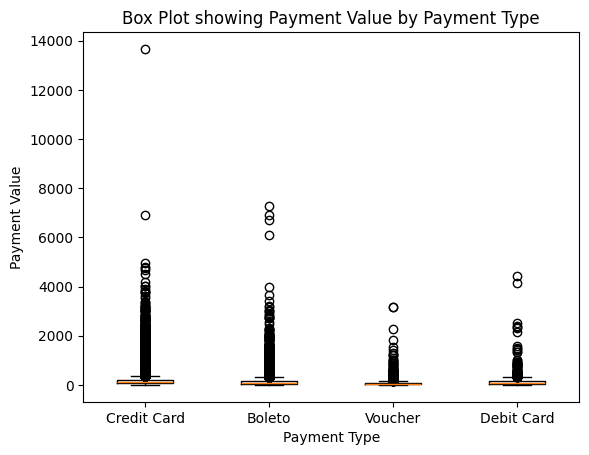

In [115]:
# Creating a box plot

payment_values = orders_payments_customers_joined['payment_value']
payment_types = orders_payments_customers_joined['payment_type']

# Creating a separate box plot per payment type
plt.boxplot([payment_values[payment_types == 'credit_card'],
             payment_values[payment_types == 'boleto'],
             payment_values[payment_types == 'voucher'],
             payment_values[payment_types == 'debit_card']],
            labels = ['Credit Card', 'Boleto', 'Voucher', 'Debit Card'])
plt.xlabel('Payment Type')
plt.ylabel('Payment Value')
plt.title('Box Plot showing Payment Value by Payment Type')
plt.show()

## 📊 Key Insights & Recommendations

### 🔍 Key Insights
- Monthly revenue increased steadily from 2017 to mid-2018, showing strong business growth.  
- Credit cards were the most preferred payment method, contributing the highest revenue share.  
- Installment payments were widely used for higher-value purchases.  
- The SP region had the highest customer concentration and revenue contribution.  

### 💡 Recommendations
- Optimize and promote credit card payment options.  
- Encourage installment plans to increase order value.  
- Focus marketing efforts on high-performing regions like SP.  
- Use vouchers strategically for customer acquisition.  
- Improve data preprocessing for more accurate analysis.


## ✅ Conclusion

In this project, we successfully cleaned, integrated, and analyzed e-commerce order, payment, and customer data to understand customer payment behavior and revenue trends. The analysis revealed a strong growth in total payment value over time, with credit cards emerging as the most preferred payment method.

Customers using credit cards generally made higher-value purchases and frequently opted for installment payments, indicating that flexible payment options encourage larger transactions. Regional analysis also showed that certain areas, particularly the SP region, contributed significantly to the customer base and overall revenue.

These insights highlight the importance of optimizing credit card payment processes while also considering the associated transaction costs. Additionally, targeted marketing in high-performing regions and strategic use of alternative payment methods such as vouchers can further support business growth.

Overall, this analysis provides valuable, data-driven insights that can help the business improve payment strategies, enhance customer experience, and make informed financial decisions.
